## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer=l1, ratio=0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizer(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizer(ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Regulization = [l1, l1_l2]
L_EXP = [1e-2, 1e-4, 1e-8]

Regulization_name = ['l1','l1','l1', 'l1_l2','l1_l2','l1_l2']

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i = 0
for l, regulizer_ratio in itertools.product(Regulization,L_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with {Regulization_name[i]}, Regulizer = {regulizer_ratio}")
    model = build_mlp(input_shape=x_train.shape[1:], regularizer=l ,ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"exp-{Regulization_name[i]}-{regulizer_ratio}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    i += 1


Experiment with l1, Regulizer = 0.01
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss

196/196 [==============================] - 3s 17ms/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4626 - val_accuracy: 0.1000
Experiment with l1, Regulizer = 0.0001
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_____

Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 2.6367 - accuracy: 0.6293 - val_loss: 2.8937 - val_accuracy: 0.5358
Experiment with l1, Regulizer = 1e-08
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

196/196 [==============================] - 3s 16ms/step - loss: 0.8668 - accuracy: 0.6956 - val_loss: 1.4158 - val_accuracy: 0.5265
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8556 - accuracy: 0.6987 - val_loss: 1.3977 - val_accuracy: 0.5293
Experiment with l1_l2, Regulizer = 0.01
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
ou

196/196 [==============================] - 4s 20ms/step - loss: 2.4614 - accuracy: 0.0972 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4614 - accuracy: 0.0977 - val_loss: 2.4612 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 2.4614 - accuracy: 0.0980 - val_loss: 2.4612 - val_accuracy: 0.1000
Experiment with l1_l2, Regulizer = 0.0001
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.7561 - accuracy: 0.4813 - val_loss: 1.7834 - val_accuracy: 0.4701
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7513 - accuracy: 0.4838 - val_loss: 1.7926 - val_accuracy: 0.4642
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7469 - accuracy: 0.4842 - val_loss: 1.7753 - val_accuracy: 0.4782
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7447 - accuracy: 0.4836 - val_loss: 1.7887 - val_accuracy: 0.4680
Experiment with l1_l2, Regulizer = 1e-08
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.6286 - accuracy: 0.5159 - val_loss: 1.6850 - val_accuracy: 0.4905
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6256 - accuracy: 0.5177 - val_loss: 1.6728 - val_accuracy: 0.5035
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6251 - accuracy: 0.5143 - val_loss: 1.6677 - val_accuracy: 0.5044
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6189 - accuracy: 0.5201 - val_loss: 1.6585 - val_accuracy: 0.5088
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.6168 - accuracy: 0.5211 - val_loss: 1.6918 - val_accuracy: 0.4784


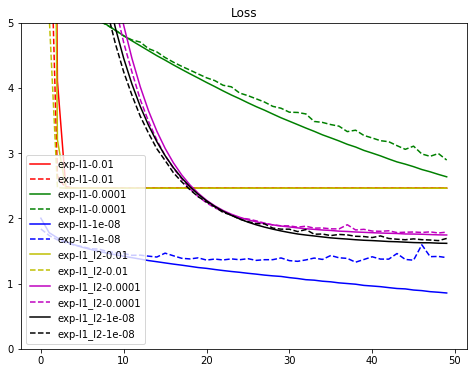

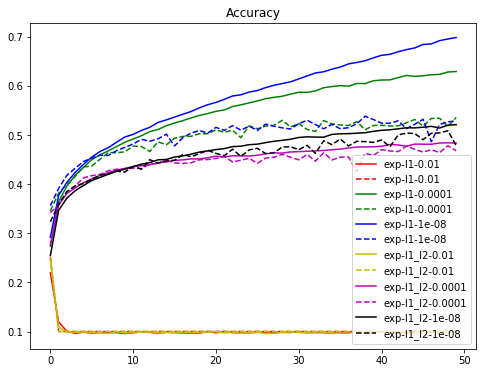

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()